In [1]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [2]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [3]:
# Load data 
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))

# data, labels = dynamic_generate_positive_gaussian_data(
#     dim=3,
#     nb_classes=3,
#     nb_points_per_class=100,
#     seed=42
# )
# data = batch_norm(data)
data[:5]

array([[1.        , 0.67346936, 0.24489795, 0.        ],
       [1.        , 0.59574461, 0.25531912, 0.        ],
       [1.        , 0.66666669, 0.24444443, 0.        ],
       [1.        , 0.65909088, 0.29545453, 0.        ],
       [1.        , 0.70833325, 0.24999997, 0.        ]])

In [4]:
# features = data[0]

# mobius = generate_mobius(features, 2)
# mobius.pop(0)
# print(len(mobius))
# capacity = mobius_to_capacity(mobius, features)

# print("Möbius:")
# for i in range(len(mobius)):
#     print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

# print("\nDerived Capacity:")
# for c in capacity:
#     print(f"Capacity of {c.X} is {c.mu:.3f}")


In [5]:
# mutated_mobius = mutate(mobius, mutation_rate=0.2)
# print("\nMutated Möbius:")
# for i in range(len(mutated_mobius)):
#     print(f"Mobius of {mutated_mobius[i].X} is {mutated_mobius[i].mu:.3f}")

In [6]:
# Generate all possible mobius for training
features = list(range(len(data[0])))    # encode features as integers

nb_total = 10

# Input Mobius (10 mobius currently)
lst_mobius = []
for i in range(nb_total):
    mobius = generate_mobius(features, 2)
    mobius.pop(0)
    lst_mobius.append(mobius)

# Mutate all mobius
mutated = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    mutated_mobius = mutate(mobius, mutation_rate=0.2)
    mutated.append(mutated_mobius)

# Add mutated mobius to the list
lst_mobius.extend(mutated)

# Cross over all mobius
crossed_over = []
for i in range(len(lst_mobius)):
    for j in range(i + 1, len(lst_mobius) // 2):
        crossed = crossover(lst_mobius[i], lst_mobius[j])
        crossed_over.append(crossed)

# Add crossed over mobius to the list
lst_mobius.extend(crossed_over)
print(f"Total number of Möbius measures: {len(lst_mobius)}")

# Convert all Möbius measures to capacities
capacities_list = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    capacity = mobius_to_capacity(mobius, features)
    capacities_list.append(capacity)    
print('Test Möbius measures completed!')
print(f"Total number of capacities: {len(capacities_list)}")

Total number of Möbius measures: 65
Test Möbius measures completed!
Total number of capacities: 65


In [7]:
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

Mobius 1: [0.5128744125984841, 0.5424913467633047, 0.10861220467881694, 0.8439598102967113, 0.492638585459124, 0.5703645211167648, 0.9469050557021842, 0.4095743152078666, 0.7905724660573277, 0.4152055455600915]
Mobius 2: [0.8813760760971528, 0.5574705877448267, 0.7143163228532291, 0.6828476522095169, 0.9851190589269841, 0.7577457485452539, 0.4070627248447857, 0.04490653823191759, 0.7612737163390908, 0.5539314960579533]
Mobius 3: [0.14635248959197766, 0.6630626312807587, 0.3411620780412187, 0.6639154744776222, 0.9107328847234831, 0.2350160116339619, 0.7371457366421674, 0.09137609768686294, 0.632460003359679, 0.29920547709347733]
Mobius 4: [0.6663598128690447, 0.10406571931182229, 0.5859740733099293, 0.9635469489838416, 0.33526573315185626, 0.8649315673124335, 0.5721041658490935, 0.8161858834940269, 0.9987368108695129, 0.6838946224884077]
Mobius 5: [0.1162984792497409, 0.008626205899914696, 0.5685670964224487, 0.9157693708169149, 0.9821829971525499, 0.8887327311057496, 0.6313973570813761

In [8]:
for i in range(len(capacities_list)):
    mobius = capacities_list[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

# All different capacities

Mobius 1: [np.float64(0.0), np.float64(0.09104497811252746), np.float64(0.09630254810736215), np.float64(0.019280735312248387), np.float64(0.14981894313466482), np.float64(0.27480025953771664), np.float64(0.21157628094312808), np.float64(0.40895760647172547), np.float64(0.18829052645523991), np.float64(0.3864631637849808), np.float64(0.24280657214081452), np.float64(0.46803880540394666), np.float64(0.7330545604398686), np.float64(0.6031958029962274), np.float64(0.5521580358267599), np.float64(1.0)]
Mobius 2: [np.float64(0.0), np.float64(0.13888577728681267), np.float64(0.08784528874022007), np.float64(0.11256077901210579), np.float64(0.1076019981907701), np.float64(0.38196449013468486), np.float64(0.3708508720349458), np.float64(0.3106320431492233), np.float64(0.20748236541542733), np.float64(0.3154075339687379), np.float64(0.307450381756798), np.float64(0.6210058825459195), np.float64(0.6736710030348433), np.float64(0.6298847424512787), np.float64(0.5223322151978672), np.float64(1.0)]

In [9]:
mobius = lst_mobius[0]
print("Möbius:")
for i in range(len(mobius)):
    print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

capacity = capacities_list[0]
print("\nDerived Capacity:")
for c in capacity:
    print(f"Capacity of {c.X} is {c.mu:.3f}")


Möbius:
Mobius of [0] is 0.513
Mobius of [1] is 0.542
Mobius of [2] is 0.109
Mobius of [3] is 0.844
Mobius of [0, 1] is 0.493
Mobius of [0, 2] is 0.570
Mobius of [0, 3] is 0.947
Mobius of [1, 2] is 0.410
Mobius of [1, 3] is 0.791
Mobius of [2, 3] is 0.415

Derived Capacity:
Capacity of [] is 0.000
Capacity of [0] is 0.091
Capacity of [1] is 0.096
Capacity of [2] is 0.019
Capacity of [3] is 0.150
Capacity of [0, 1] is 0.275
Capacity of [0, 2] is 0.212
Capacity of [0, 3] is 0.409
Capacity of [1, 2] is 0.188
Capacity of [1, 3] is 0.386
Capacity of [2, 3] is 0.243
Capacity of [0, 1, 2] is 0.468
Capacity of [0, 1, 3] is 0.733
Capacity of [0, 2, 3] is 0.603
Capacity of [1, 2, 3] is 0.552
Capacity of [0, 1, 2, 3] is 1.000


In [10]:
import copy

In [11]:
C = KNNFuzz(input_dimension = data.shape[1], mu=mobius, sim=S1, choquet_version='linear', p=1, q=2)
C.train(data, labels)
C.score(data[0])

np.int64(1)

In [14]:
# Fuzzy verion
def FuzzLOO(DS, mu, sim = S1, choquet_version='linear', p=1, q=1, time_counter=False):
    """ Classifieur * tuple[array, array] -> float
    """
    ###################### A COMPLETER 
    pt = 0
    Xm, Ym = DS

    input_dimension= Xm[0].shape[0]

    C = KNNFuzz(input_dimension = input_dimension, mu=mu, sim=sim, choquet_version=choquet_version, p=p, q=q)

    if time_counter:
        tic = time.time()
    for i in range(len(Xm)):
        Xtest, Ytest = Xm[i], Ym[i]
        
        Xapp, Yapp = np.array(list(Xm[:i])+list(Xm[i+1:])), np.array(list(Ym[:i])+list(Ym[i+1:]))

        cl = copy.deepcopy(C)
        cl.train(desc_set=Xapp, label_set=Yapp)

        if cl.accuracy([Xtest], [Ytest]) == 1: pt += 1

    if time_counter:
        toc = time.time()
        print(f'Result in {(toc-tic):0.4f} seconds.')
    
    return pt/len(Xm)

In [15]:
FuzzLOO(
    # C=C,
    DS=(data, labels),
    mu=lst_mobius[64],
)

0.66

In [17]:
def fitness_function(capacities_list: np.ndarray, DS: Tuple[np.ndarray, np.ndarray], sim = S1, choquet_version='linear', p=1, q=1, time_counter=False, verbose=False) -> np.ndarray:
    """
    Objective function for optimizing Möbius measures:
    - capacities_list: list of Möbius measures represented as capacities
    - DS: Tuple (X_data, y_data)
    - C: Choquet similarity function (e.g., Choquet_classic)
    
    Returns:
    - 1D array of negative LOO accuracy (to minimize)
    """
    results = []
    i = 0
    # Replace capacities computation with Mobius instead
    # Isolate Classifier outside please
    for capacity in capacities_list:
        i += 1
        if not is_monotonic(capacity):
            results.append(float('inf'))  # Penalize non-monotonic capacity
            continue

        acc = FuzzLOO(DS, capacity, sim=sim, choquet_version=choquet_version, p=p, q=q, time_counter=time_counter)

        # negative accuracy for minimization
        results.append(-acc)

        if verbose: 
            print(f"Processing capacity {i}/{len(capacities_list)}...")
            tmp = [capacity[j].mu for j in range(len(capacity))]
            print(f"Capacities {i}: {tmp}")
            print(f"Accuracy: {acc:.4f}\n")

    return np.array(results)

In [18]:
FF_res = fitness_function(
    # C = C,
    capacities_list=capacities_list,
    DS=(data, labels),
    sim=S1,
    choquet_version='d_choquet',
    p=1,
    q=1,
    time_counter=False, 
    verbose=True
)

Processing capacity 1/65...
Capacities 1: [np.float64(0.0), np.float64(0.09104497811252746), np.float64(0.09630254810736215), np.float64(0.019280735312248387), np.float64(0.14981894313466482), np.float64(0.27480025953771664), np.float64(0.21157628094312808), np.float64(0.40895760647172547), np.float64(0.18829052645523991), np.float64(0.3864631637849808), np.float64(0.24280657214081452), np.float64(0.46803880540394666), np.float64(0.7330545604398686), np.float64(0.6031958029962274), np.float64(0.5521580358267599), np.float64(1.0)]
Accuracy: 0.6667

Processing capacity 2/65...
Capacities 2: [np.float64(0.0), np.float64(0.13888577728681267), np.float64(0.08784528874022007), np.float64(0.11256077901210579), np.float64(0.1076019981907701), np.float64(0.38196449013468486), np.float64(0.3708508720349458), np.float64(0.3106320431492233), np.float64(0.20748236541542733), np.float64(0.3154075339687379), np.float64(0.307450381756798), np.float64(0.6210058825459195), np.float64(0.6736710030348433)

In [19]:
# Get the best capacity
best_index = np.argmin(FF_res)
best_capacity = capacities_list[best_index]
print(f"Best capacity index: {best_index}, Accuracy: {-FF_res[best_index]:.4f}")

# get best mobius
best_mobius = lst_mobius[best_index]
print(f"Best Möbius measure: {[f'{m.X}: {m.mu:.3f}' for m in best_mobius]}")

Best capacity index: 0, Accuracy: 0.6667
Best Möbius measure: ['[0]: 0.513', '[1]: 0.542', '[2]: 0.109', '[3]: 0.844', '[0, 1]: 0.493', '[0, 2]: 0.570', '[0, 3]: 0.947', '[1, 2]: 0.410', '[1, 3]: 0.791', '[2, 3]: 0.415']


In [20]:
# get mobius
for i in range(len(capacities_list[best_index])):
    print(capacities_list[best_index][i].X, capacities_list[best_index][i].mu)

[] 0.0
[0] 0.09104497811252746
[1] 0.09630254810736215
[2] 0.019280735312248387
[3] 0.14981894313466482
[0, 1] 0.27480025953771664
[0, 2] 0.21157628094312808
[0, 3] 0.40895760647172547
[1, 2] 0.18829052645523991
[1, 3] 0.3864631637849808
[2, 3] 0.24280657214081452
[0, 1, 2] 0.46803880540394666
[0, 1, 3] 0.7330545604398686
[0, 2, 3] 0.6031958029962274
[1, 2, 3] 0.5521580358267599
[0, 1, 2, 3] 1.0


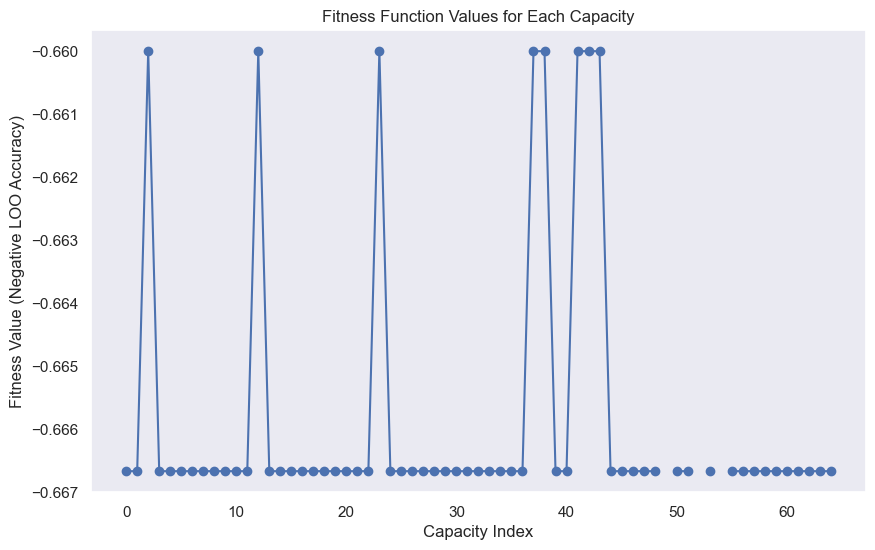

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(capacities_list)), FF_res, marker='o')
plt.title('Fitness Function Values for Each Capacity')
plt.xlabel('Capacity Index')
plt.ylabel('Fitness Value (Negative LOO Accuracy)')
plt.grid()
plt.show()